## Final Project Submission

Please fill out:
* Student name: Ivy Kemunto 
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

 For this analysis, we will focus on the following questions:

What genres of movie are likely to succeed?
Do multiple genre movies perform better than single genre movies?
Is there a correlation between how movies perform domestically and internationally?
Is there a correlation between how long a movie is run and how it is rated?
Does the studio producing a movie determine how much gross the movie makes?



IMPORTING APPROPRIATE LIBRARIES

In [2]:
# importing appropriate libraries
import requests
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style


(A)DATA EXTRACTION AND DATA EXPLORATION

Step one
I extracted the data, the data was in csv file formart

In [3]:
# Loading data from the title basics file
imdb_title_basics = pd.read_csv("ZippedData/imdb.title.basics.csv.gz")
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [4]:
#view dataframe as index
imdb_title_basics.index

RangeIndex(start=0, stop=146144, step=1)

In [5]:
#knowing the data types of the data frame
imdb_title_basics.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [6]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
# Selecting the imdb_title_basics columns
imdb_title_basics.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [8]:
#Getting the shapes of the imdb_title_basics to know the number of rows and columns in the data frame 
imdb_title_basics.shape

(146144, 6)

In [9]:
#printing information on the imdb_title_basics data frame (understanding the columns that are in the data frame)
imdb_title_basics.info

<bound method DataFrame.info of            tconst                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad

In [10]:
#describing the data frame to get more information off the imdb_title_basics data frame
imdb_title_basics.describe

<bound method NDFrame.describe of            tconst                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ash

ANALYSIS OF THE NON NUMERIC COLUMNS

In [11]:
#Analysis of the "tconst" column
imdb_title_basics["tconst"].describe

<bound method NDFrame.describe of 0         tt0063540
1         tt0066787
2         tt0069049
3         tt0069204
4         tt0100275
            ...    
146139    tt9916538
146140    tt9916622
146141    tt9916706
146142    tt9916730
146143    tt9916754
Name: tconst, Length: 146144, dtype: object>

In [12]:
#Analysis of the "primary_title" column
imdb_title_basics["primary_title"].describe

<bound method NDFrame.describe of 0                                           Sunghursh
1                     One Day Before the Rainy Season
2                          The Other Side of the Wind
3                                     Sabse Bada Sukh
4                            The Wandering Soap Opera
                             ...                     
146139                            Kuambil Lagi Hatiku
146140    Rodolpho Teóphilo - O Legado de um Pioneiro
146141                                Dankyavar Danka
146142                                         6 Gunn
146143                 Chico Albuquerque - Revelações
Name: primary_title, Length: 146144, dtype: object>

In [13]:
#Analysis of the "original_title" column
imdb_title_basics["original_title"].describe

<bound method NDFrame.describe of 0                                           Sunghursh
1                                     Ashad Ka Ek Din
2                          The Other Side of the Wind
3                                     Sabse Bada Sukh
4                               La Telenovela Errante
                             ...                     
146139                            Kuambil Lagi Hatiku
146140    Rodolpho Teóphilo - O Legado de um Pioneiro
146141                                Dankyavar Danka
146142                                         6 Gunn
146143                 Chico Albuquerque - Revelações
Name: original_title, Length: 146144, dtype: object>

In [14]:
#Analysis of the "genres" column
imdb_title_basics["genres"].describe

<bound method NDFrame.describe of 0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                     NaN
146143             Documentary
Name: genres, Length: 146144, dtype: object>

In [15]:
#Analysis of the "start_year" column
imdb_title_basics["start_year"].describe

<bound method NDFrame.describe of 0         2013
1         2019
2         2018
3         2018
4         2017
          ... 
146139    2019
146140    2015
146141    2013
146142    2017
146143    2013
Name: start_year, Length: 146144, dtype: int64>

In [16]:
#getting the statistical properties from the imdb_title_basics data frame 
imdb_title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [17]:
#Numerical analysis of the "start_year" column
imdb_title_basics["start_year"].describe()

count    146144.000000
mean       2014.621798
std           2.733583
min        2010.000000
25%        2012.000000
50%        2015.000000
75%        2017.000000
max        2115.000000
Name: start_year, dtype: float64

In [18]:
#Numerical analysis of the "runtime_minutes" column
imdb_title_basics["runtime_minutes"].describe()

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

IMDB TITLE RATINGS

In [19]:
# Loading data from the ratings file
imdb_title_ratings = pd.read_csv("ZippedData/imdb.title.ratings.csv.gz")
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [20]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [21]:
# Selecting the imdb_title_ratings columns
imdb_title_ratings.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [22]:
#Getting the shapes of the imdb_title_ratings
imdb_title_ratings.shape

(73856, 3)

In [23]:
#checking the data types
imdb_title_ratings.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

In [24]:
#printing information on the imdb_title_ratings data frame
imdb_title_ratings.info

<bound method DataFrame.info of            tconst  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]>

In [25]:
#describing the data frame to get more information off the imdb_title_ratings data frame
imdb_title_ratings.describe

<bound method NDFrame.describe of            tconst  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]>

ANALYSIS OF THE DIFFERENT COLUMNS

In [26]:
#Analysis of the "tconst" column
imdb_title_ratings["tconst"].describe

<bound method NDFrame.describe of 0        tt10356526
1        tt10384606
2         tt1042974
3         tt1043726
4         tt1060240
            ...    
73851     tt9805820
73852     tt9844256
73853     tt9851050
73854     tt9886934
73855     tt9894098
Name: tconst, Length: 73856, dtype: object>

In [27]:
#Analysis of the "averagerating" column
imdb_title_ratings["averagerating"].describe

<bound method NDFrame.describe of 0        8.3
1        8.9
2        6.4
3        4.2
4        6.5
        ... 
73851    8.1
73852    7.5
73853    4.7
73854    7.0
73855    6.3
Name: averagerating, Length: 73856, dtype: float64>

In [28]:
#Analysis of the "numvotes" column
imdb_title_ratings["numvotes"].describe

<bound method NDFrame.describe of 0           31
1          559
2           20
3        50352
4           21
         ...  
73851       25
73852       24
73853       14
73854        5
73855      128
Name: numvotes, Length: 73856, dtype: int64>

In [29]:
#getting the statistical properties from the imdb_title_ratings data frame 
imdb_title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


BOM MOVIES GROSS


In [30]:
# Loading data from the bom.movies_gross file
bom_movie_gross = pd.read_csv("ZippedData/bom.movie_gross.csv.gz")
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [31]:
bom_movie_gross.head

<bound method NDFrame.head of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0  

In [32]:
# Selecting the bom_movie_gross columns
bom_movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [33]:
#Getting the shapes of the bom_movie_gross
bom_movie_gross.shape

(3387, 5)

In [34]:
bom_movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [35]:
#printing information on the bom_movie_gross  data frame
bom_movie_gross.info

<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [36]:
#describing the data frame to get more information off the bom_movie_gross data frame
bom_movie_gross.describe

<bound method NDFrame.describe of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700

In [37]:
#Analysis of the "title" column
bom_movie_gross["title"].describe

<bound method NDFrame.describe of 0                                       Toy Story 3
1                        Alice in Wonderland (2010)
2       Harry Potter and the Deathly Hallows Part 1
3                                         Inception
4                               Shrek Forever After
                           ...                     
3382                                      The Quake
3383                    Edward II (2018 re-release)
3384                                       El Pacto
3385                                       The Swan
3386                              An Actor Prepares
Name: title, Length: 3387, dtype: object>

In [38]:
#Analysis of the "studio" column
bom_movie_gross["studio"].describe

<bound method NDFrame.describe of 0               BV
1               BV
2               WB
3               WB
4             P/DW
           ...    
3382         Magn.
3383            FM
3384          Sony
3385    Synergetic
3386         Grav.
Name: studio, Length: 3387, dtype: object>

In [39]:
#Analysis of the "domestic_gross" column
bom_movie_gross["domestic_gross"].describe

<bound method NDFrame.describe of 0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64>

In [40]:
#Analysis of the "foreign_gross" column
bom_movie_gross["foreign_gross"].describe

<bound method NDFrame.describe of 0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382          NaN
3383          NaN
3384          NaN
3385          NaN
3386          NaN
Name: foreign_gross, Length: 3387, dtype: object>

In [41]:
#Analysis of the "year" column
bom_movie_gross["year"].describe

<bound method NDFrame.describe of 0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
3382    2018
3383    2018
3384    2018
3385    2018
3386    2018
Name: year, Length: 3387, dtype: int64>

In [42]:
#getting the statistical properties from the bom_movie_gross data frame 
bom_movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [43]:
bom_movie_gross["domestic_gross"].describe

<bound method NDFrame.describe of 0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64>

In [44]:
bom_movie_gross["year"].describe

<bound method NDFrame.describe of 0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
3382    2018
3383    2018
3384    2018
3385    2018
3386    2018
Name: year, Length: 3387, dtype: int64>

(B)DATA CLEANING and data wrangling 

In [123]:
#Checking if the data types in the imdb_title_basics have been properly assigned 
imdb_title_basics.dtypes

tconst              object
runtime_minutes    float64
genres              object
dtype: object

values in the "imdb_title_basics" are properly assigned

In [46]:
#Dropping some columns
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [47]:
#Removing some columns
a=imdb_title_basics.drop("primary_title",axis=1)
b=a.drop("original_title",axis=1)
imdb_title_basics=b.drop("start_year",axis=1)


Columns have been dropped as they are going to be duplicates late when merging the data frame with another data frame

In [48]:
imdb_title_basics

,tconst,runtime_minutes,genres
0,tt0063540,175.0,"Action,Crime,Drama"
1,tt0066787,114.0,"Biography,Drama"
2,tt0069049,122.0,Drama
3,tt0069204,NaN,"Comedy,Drama"
4,tt0100275,80.0,"Comedy,Drama,Fantasy"
...,...,...,...
146139,tt9916538,123.0,Drama
146140,tt9916622,NaN,Documentary
146141,tt9916706,NaN,Comedy
146142,tt9916730,116.0,NaN


Data types in the imdb_title_basics have been properly assigned and columns succesfully dropped as the columns were going to be duplicates wgen merging

In [49]:
#Checking if the data types in the imdb_title_ratings have been properly assigned 
imdb_title_ratings.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

Data types in the imdb_title_ratings have been properly assigned

In [50]:
#Merging the "imdb_title_basics" and the "imdb_title_ratings" data frames at tconst
imdbbr= imdb_title_basics.merge(imdb_title_ratings, how="right",on="tconst")
imdbbr

,tconst,runtime_minutes,genres,averagerating,numvotes
0,tt10356526,117.0,Romance,8.3,31
1,tt10384606,87.0,Documentary,8.9,559
2,tt1042974,90.0,Drama,6.4,20
3,tt1043726,99.0,"Action,Adventure,Fantasy",4.2,50352
4,tt1060240,73.0,"Mystery,Thriller",6.5,21
...,...,...,...,...,...
73851,tt9805820,84.0,Documentary,8.1,25
73852,tt9844256,120.0,"Action,Animation,Sci-Fi",7.5,24
73853,tt9851050,NaN,"Action,Drama",4.7,14
73854,tt9886934,81.0,Documentary,7.0,5


In [51]:
imdbbr.shape

(73856, 5)

In [124]:
#checking for missing values in the imdbbr data frame
imdbbr.isna().sum()

tconst               0
runtime_minutes      0
genres             804
averagerating        0
numvotes             0
dtype: int64

there is presence of missing values in the "genres" column and the "runtime_minutes"

In [53]:
#Replacing the missing values in the "runtime_minutes" columns
mean_runtime_minutes=imdbbr["runtime_minutes"].mean()
mean_runtime_minutes

94.6540400990398

In [54]:
#Replacing the "runtime_minutes" missing values with the mean value of the column "runtime_minutes"
imdbbr["runtime_minutes"].fillna(mean_runtime_minutes,inplace=True)

In [55]:
#confirming if there are any missing vlues i  the "runtime_minutes" column
imdbbr.isna().sum()

tconst               0
runtime_minutes      0
genres             804
averagerating        0
numvotes             0
dtype: int64

In [56]:
# dropping the rest of the missing values in the imdbbr data frame 
imdb_new=imdbbr.dropna()
imdb_new

,tconst,runtime_minutes,genres,averagerating,numvotes
0,tt10356526,117.00000,Romance,8.3,31
1,tt10384606,87.00000,Documentary,8.9,559
2,tt1042974,90.00000,Drama,6.4,20
3,tt1043726,99.00000,"Action,Adventure,Fantasy",4.2,50352
4,tt1060240,73.00000,"Mystery,Thriller",6.5,21
...,...,...,...,...,...
73851,tt9805820,84.00000,Documentary,8.1,25
73852,tt9844256,120.00000,"Action,Animation,Sci-Fi",7.5,24
73853,tt9851050,94.65404,"Action,Drama",4.7,14
73854,tt9886934,81.00000,Documentary,7.0,5


In [125]:
#confirming if there are any missing values in the imdb_new data frame
imdb_new.isna().sum()

tconst             0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

missing data in columns succsefully dropped

Done cleaning the imdb_new data frame, time to rectify the bom_movie_gross

In [58]:
#Checking if the bom_movie_gross has properly assigned data types
bom_movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

the "foreign_gross" has been misassigned 

In [59]:
#Checking for missing values on bom_movie_gross
bom_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [60]:
#Replacing the missing values in the "domestic_gross" columns
mean_domestic_gross=bom_movie_gross["domestic_gross"].mean()
mean_domestic_gross

28745845.06698422

In [61]:
#Replacing the "runtime_minutes" missing values with the mean value of the column "runtime_minutes"
bom_movie_gross["domestic_gross"].fillna(mean_domestic_gross,inplace=True)

In [62]:
#Checking for presence of missing values in the bom_movie_gross data frame
bom_movie_gross.isna().sum()

title                0
studio               5
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [126]:
#Checking for data type and missing values in "foreign_gross"
bom_movie_gross["foreign_gross"]

0       6.520000e+08
1       6.913000e+08
2       6.643000e+08
3       5.357000e+08
4       5.139000e+08
            ...     
3382    7.487281e+07
3383    7.487281e+07
3384    7.487281e+07
3385    7.487281e+07
3386    7.487281e+07
Name: foreign_gross, Length: 3387, dtype: float64

"foreign_gross" has been assigned the wrong data type and there is presence of missing values

In [64]:
#converting the "foreign_gross" column to a float
bom_movie_gross["foreign_gross"]=bom_movie_gross["foreign_gross"].map(lambda x: str(x))
import string
bom_movie_gross["foreign_gross"]=bom_movie_gross["foreign_gross"].map(lambda x: x.strip(string.punctuation))
bom_movie_gross["foreign_gross"]=bom_movie_gross["foreign_gross"].str.replace(",","").astype(float)

In [65]:
bom_movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [66]:
#Replaccing missing values in "foreign_gross" with the mean value
mean_foreign_gross=bom_movie_gross["foreign_gross"].mean()
mean_foreign_gross

74872810.15046637

In [67]:
#Using the mean_foreign_gross to replace the missing values in "foreign_gross"
bom_movie_gross["foreign_gross"].fillna(mean_foreign_gross,inplace=True)

In [68]:
bom_movie_gross.isna().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [69]:
# Dropping the missing values in the bom_movie_gross data frame
bommovieg=bom_movie_gross.dropna()
bommovieg

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010
3,Inception,WB,292600000.0,5.357000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.487281e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,7.487281e+07,2018
3384,El Pacto,Sony,2500.0,7.487281e+07,2018
3385,The Swan,Synergetic,2400.0,7.487281e+07,2018


In [70]:
#Checking if there are any missing values
bommovieg.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [71]:
#merging the bommovieg and imdb_new data frames to form imdbom

imdbom= bommovieg.join(imdb_new, how="inner",lsuffix=True)
imdbom

,title,studio,domestic_gross,foreign_gross,year,tconst,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010,tt10356526,117.00000,Romance,8.3,31
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010,tt10384606,87.00000,Documentary,8.9,559
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010,tt1042974,90.00000,Drama,6.4,20
3,Inception,WB,292600000.0,5.357000e+08,2010,tt1043726,99.00000,"Action,Adventure,Fantasy",4.2,50352
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010,tt1060240,73.00000,"Mystery,Thriller",6.5,21
...,...,...,...,...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.487281e+07,2018,tt1733120,90.00000,Horror,6.8,19
3383,Edward II (2018 re-release),FM,4800.0,7.487281e+07,2018,tt1733300,94.65404,"Documentary,History",5.3,15
3384,El Pacto,Sony,2500.0,7.487281e+07,2018,tt1734082,64.00000,Documentary,7.8,17
3385,The Swan,Synergetic,2400.0,7.487281e+07,2018,tt1736040,73.00000,"Horror,Thriller",3.0,61


In [72]:
#Checking the datatypes
imdbom.dtypes

title               object
studio              object
domestic_gross     float64
foreign_gross      float64
year                 int64
tconst              object
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

In [73]:
imdbom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3349 entries, 0 to 3386
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3349 non-null   object 
 1   studio           3349 non-null   object 
 2   domestic_gross   3349 non-null   float64
 3   foreign_gross    3349 non-null   float64
 4   year             3349 non-null   int64  
 5   tconst           3349 non-null   object 
 6   runtime_minutes  3349 non-null   float64
 7   genres           3349 non-null   object 
 8   averagerating    3349 non-null   float64
 9   numvotes         3349 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 287.8+ KB


In [74]:
imdbom.isna().sum()

title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
tconst             0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [75]:
imdbom.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'tconst',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

The imdbom data frames is now clean ready for exploration

DATA ANALYSIS

What genre is likely to have high averageratings(audiences are inclined to what genre)?

In [95]:
# Splitting and exploding the genres
#Arranging the top ten genres with the highest ratings


imdbom["genrelist"]=imdbom["genres"].str.split(',')
imdbom1=imdbom.explode("genrelist")
genre_averagerating=imdbom1.groupby("genrelist") \
                             .median()[["averagerating"]] \
                             .sort_values('averagerating', ascending=False) \
                             .head(10)
genre_averagerating.reset_index(inplace=True)
genre_averagerating

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11412\2020461526.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre_averagerating=imdbom1.groupby("genrelist") \


,genrelist,averagerating
0,News,7.40
1,Documentary,7.40
2,Music,7.40
3,History,7.10
4,Biography,7.10
5,Sport,7.00
6,War,6.80
7,Drama,6.50
8,Family,6.45
9,Musical,6.40


Text(0.5, 1.0, 'genrelist vs averagerating')

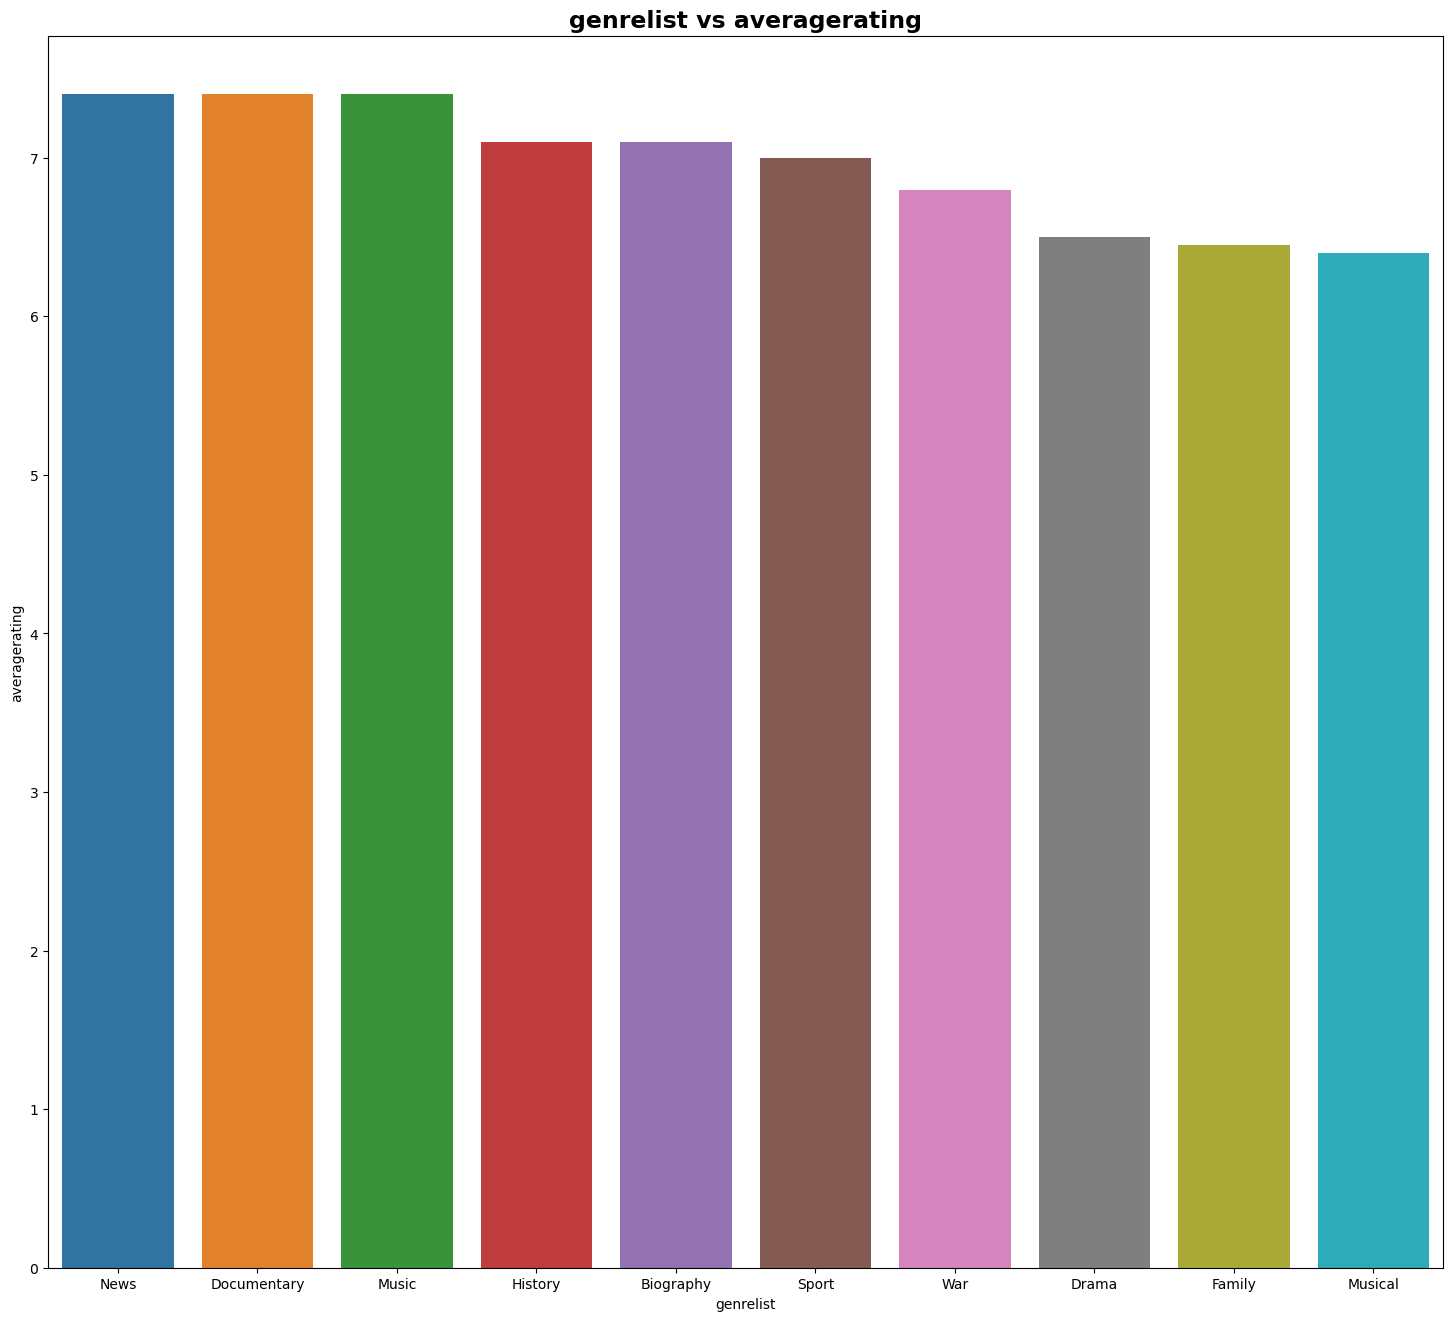

In [103]:
#plotting the genre_averagerating
df=pd.DataFrame(genre_averagerating)
plt.figure(figsize=(18,16))
ax=sns.barplot(x="genrelist",y="averagerating",data=df)
plt.title("genrelist vs averagerating",fontsize=17,weight="bold")

The Genre most likely to succedd is the News followed by documentary and finally the music genres with ratings of 7.40 each

In [104]:
#Checking if movies with multiple genres perform better 
genresavg=imdbom.groupby("genres") \
                             .median()[["averagerating"]] \
                             .sort_values('averagerating', ascending=False) \
                             .head(10)
genresavg.reset_index(inplace=True)
genresavg

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11412\1241931147.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genresavg=imdbom.groupby("genres") \


,genres,averagerating
0,"Comedy,Documentary,Romance",9.1
1,"Music,Mystery",9.0
2,"Documentary,Western",8.7
3,"Documentary,Family,Sport",8.5
4,"Adventure,Family,Mystery",8.4
5,"Action,Documentary,History",8.4
6,"Drama,Mystery,War",8.3
7,Sport,8.3
8,"Comedy,Western",8.2
9,"Adventure,Documentary,Sport",8.2


Text(0.5, 1.0, 'genres vs averagerating')

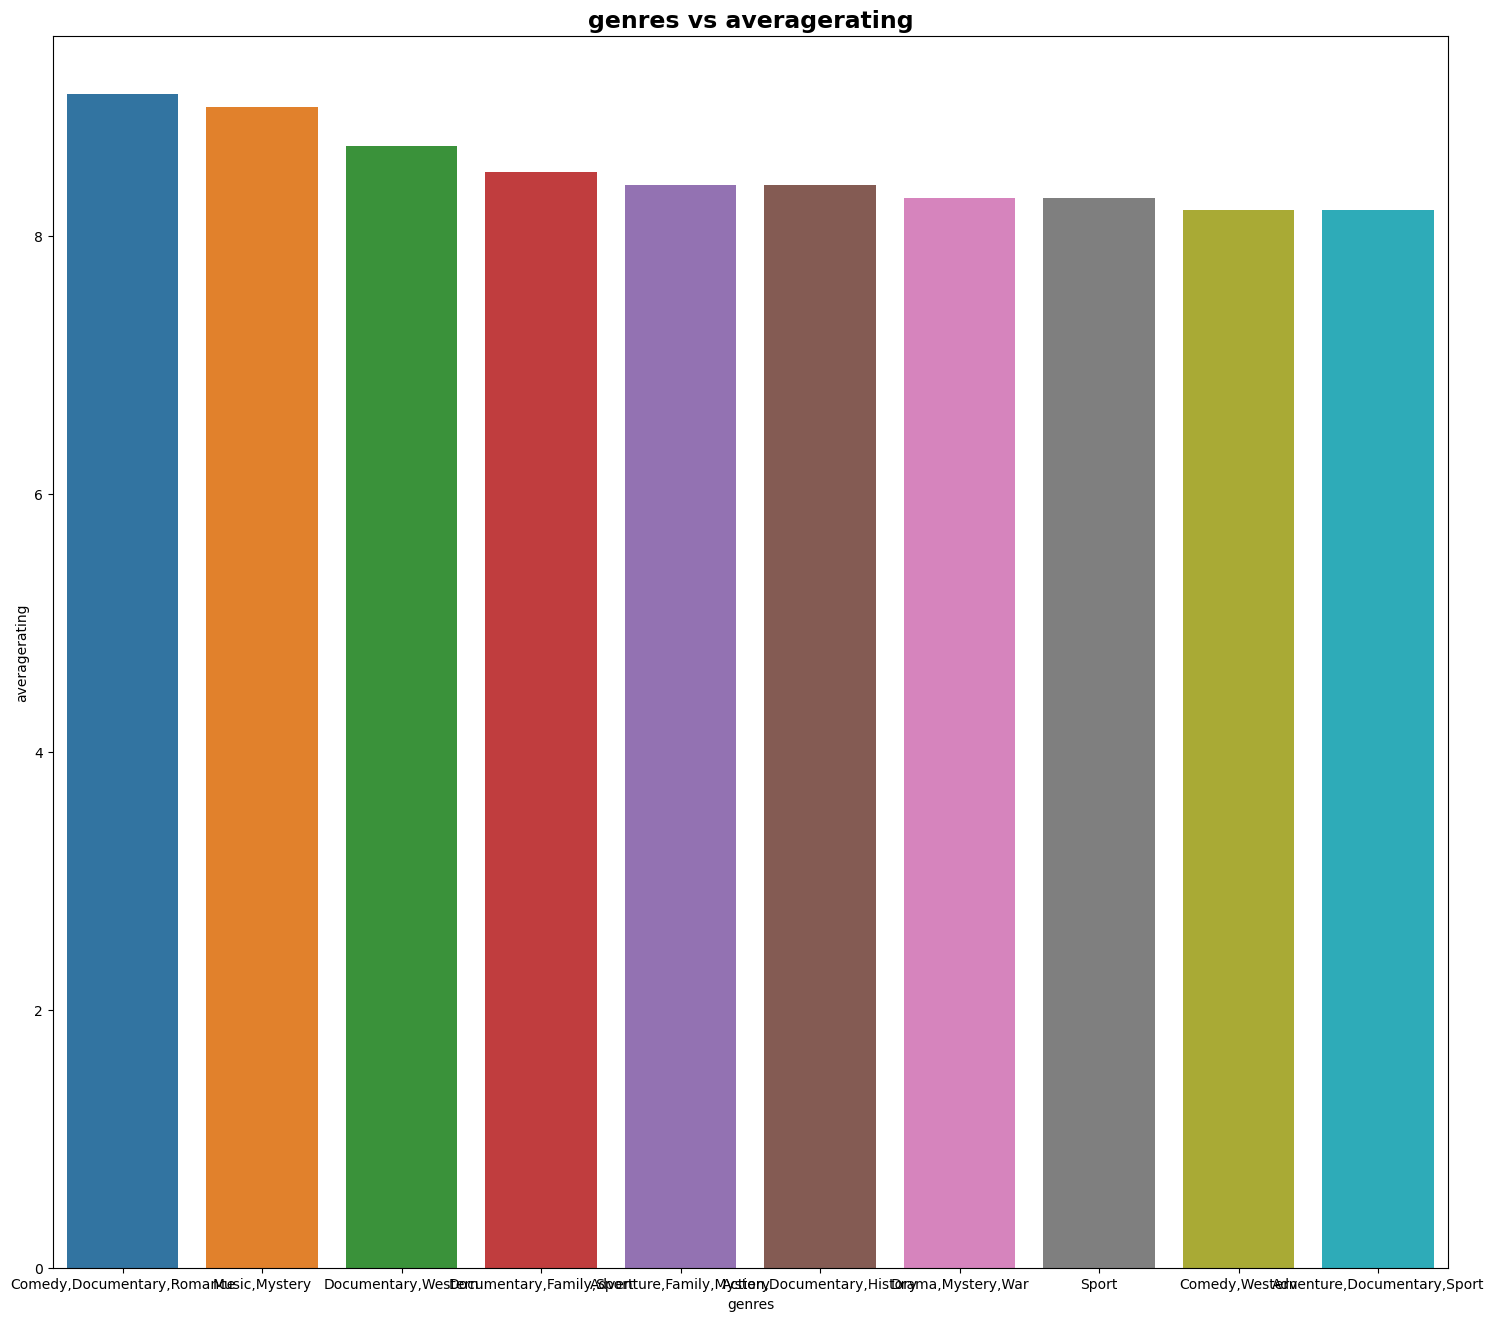

In [105]:
#plotting the genresavg
df1=pd.DataFrame(genresavg)
plt.figure(figsize=(18,16))
ax=sns.barplot(x="genres",y="averagerating",data=df1)
plt.title("genres vs averagerating",fontsize=17,weight="bold")

(Comedy,Documentary,Romance),(Music,Mystery),(Documentary,Western)	had the highest rating of 9.1,9.0 and 8.7 respectively

DO MOVIES WITH ONE GENRE PERFORM BETTER THAN THOSE WITH MULTIPLE GENRES?
-Movies with multiple genres perform better as shown by the barplots. While the movie with multiple genres posts a rating of 9.1 as its highest rating, the single rating one posts a rating of 7.40 showing that audiences are more likely to be receptive if a entertainment provided has multiple genres 

Foreign_gross vs Domestic_gross
Here we are checking if there is a correlation between how movies perform locally and internationally 


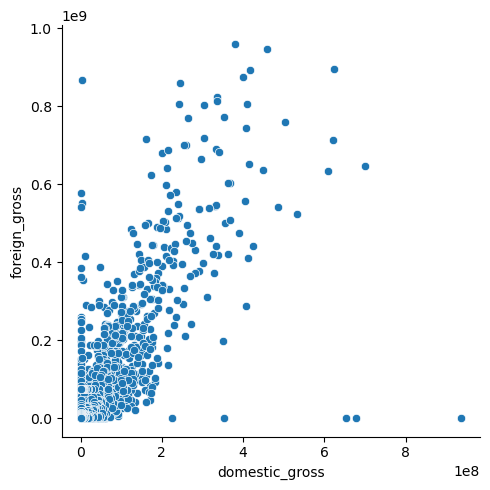

In [112]:
sns.relplot(data=imdbom ,x="domestic_gross",y="foreign_gross")

A movie that performs well locally is likey to perform internationally as the grosses are directly proportional

<AxesSubplot: xlabel='numvotes', ylabel='averagerating'>

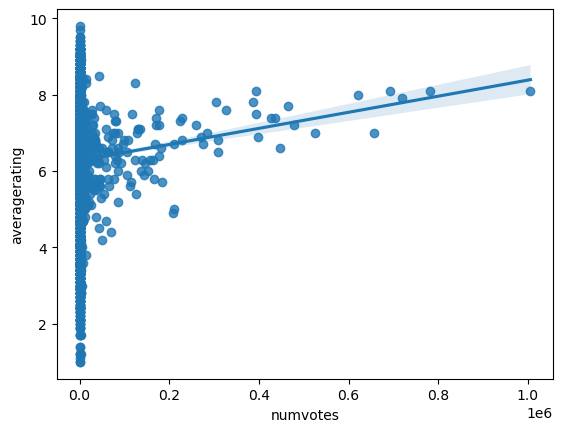

In [114]:
sns.regplot(data=imdbom ,x="numvotes",y="averagerating")

an increased number of votes increases the average ratings

 Runtime_minutes vs averagerating: Does the amount of time affect how a movie is rated

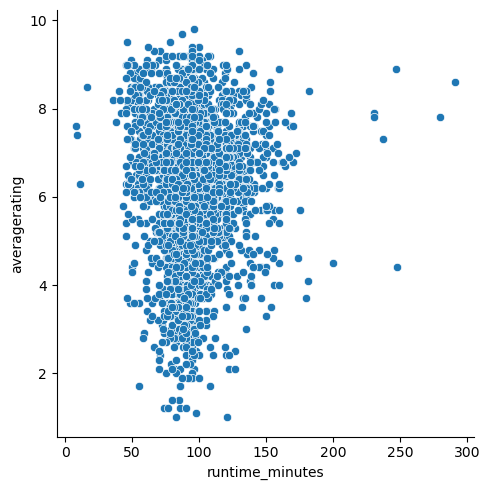

In [117]:
#checking for the relationship between Runtime minutes and averagerating
sns.relplot(data=imdbom ,x="runtime_minutes",y="averagerating")

An increase in run time minutes probably increases averagerating 

Text(0.5, 1.0, 'studio vs domestic_gross')

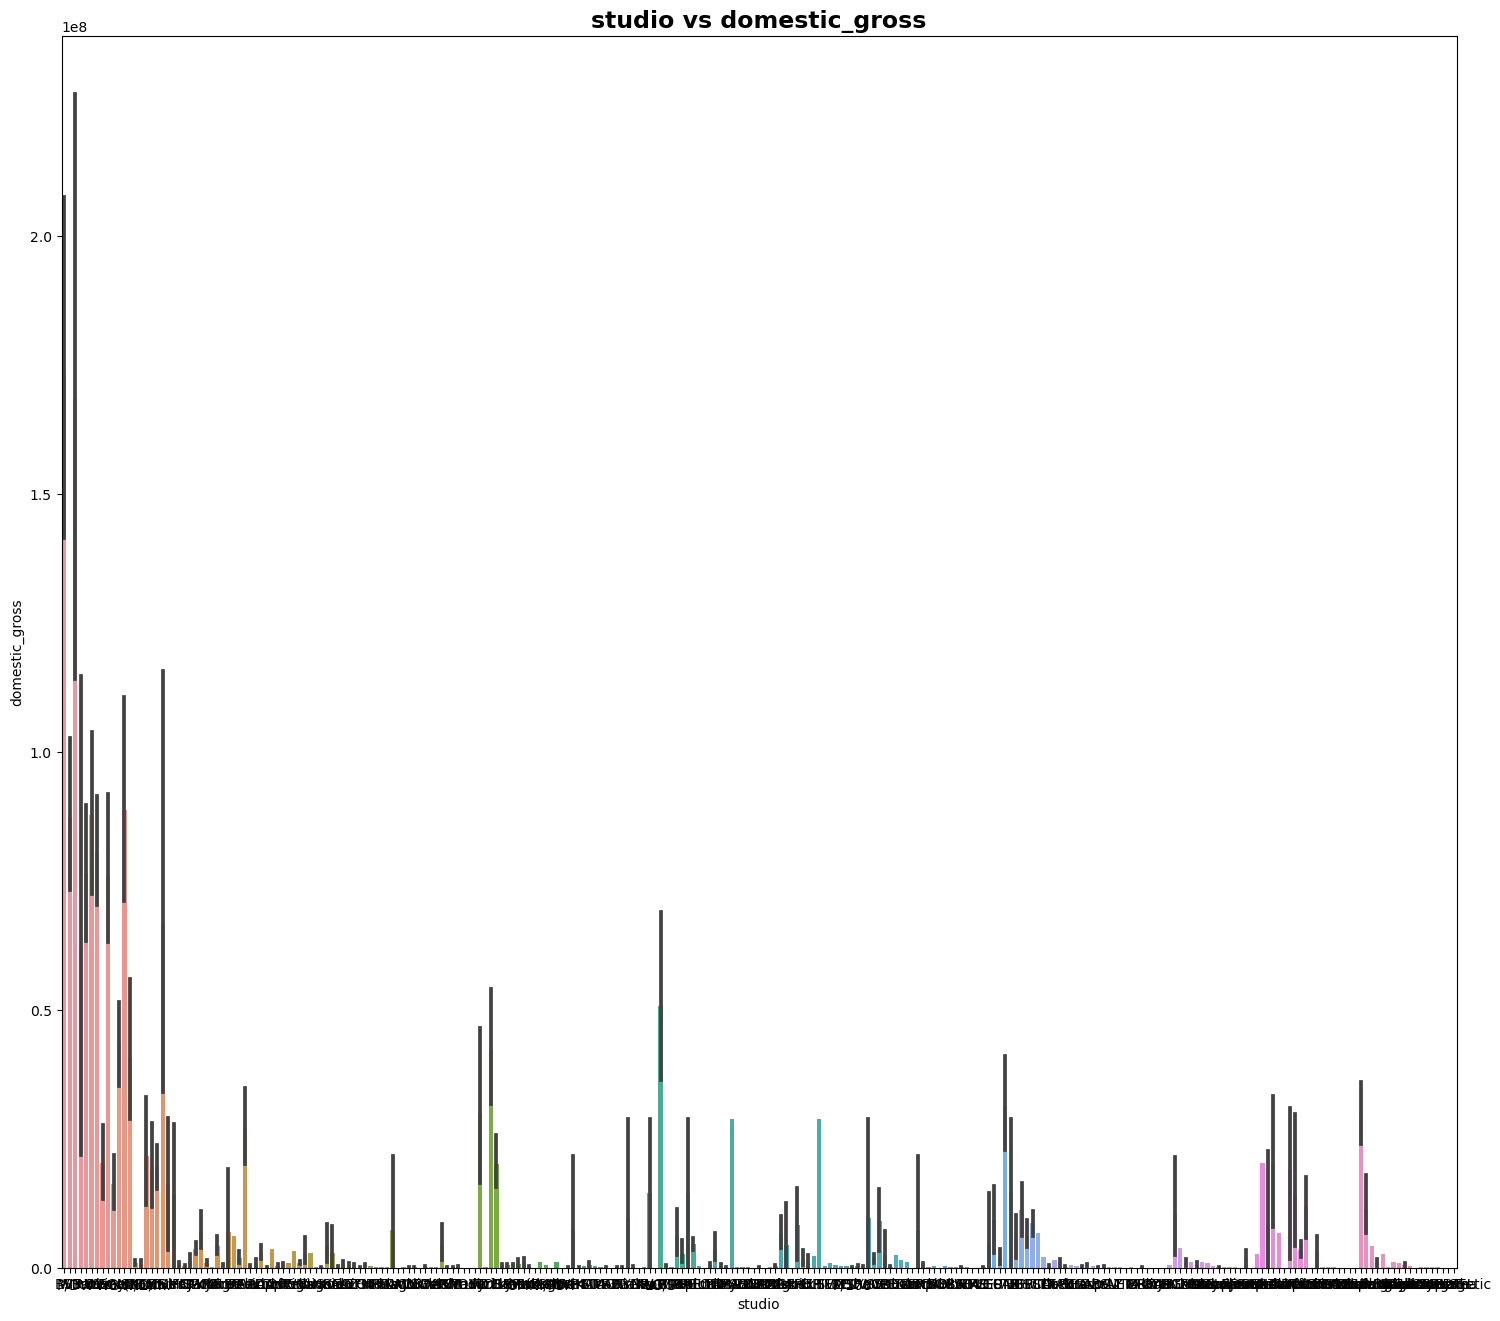

In [127]:
#studio vs domestic gross
plt.figure(figsize=(18,16))
imdbom.head
ax=sns.barplot(x="studio",y="domestic_gross",data=imdbom)
plt.title("studio vs domestic_gross",fontsize=17,weight="bold")

Some studios Are more likely to produce movies that bring in better gross

In [ ]:
# runtime_minutes vs domestic_gross

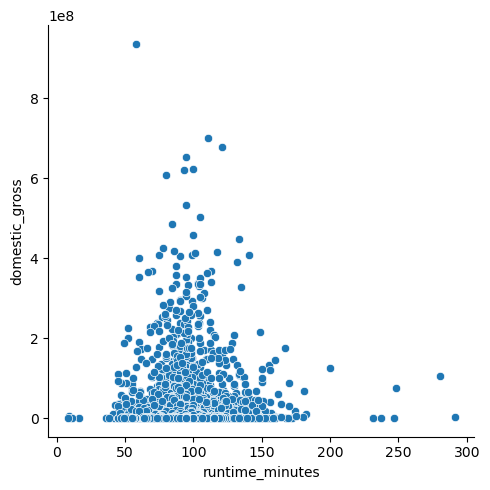

In [120]:
sns.relplot(data=imdbom ,x="runtime_minutes",y="domestic_gross")